# TP 1 : Optimisation sans contrainte

# Exercice 1 (énergie rayonnante d'un corps noir).
 L'énergie rayonnante d'un corps noir dans l'intervalle d'émission $[\lambda, \lambda+d \lambda]$, par unité de surface et de temps, est appelée émittance monochromatique maximale du corps noir et est notée $M(\lambda)$. Sa valeur, exprimée en $W b / m^2$, est donnée par la loi de Planck :
$$
M(\lambda)=\frac{2 \pi h C_0^2}{n^2 \lambda^5} \frac{1}{\exp \left(\frac{h C_0}{n k T \lambda}\right)-1} .
$$

Les constantes intervenant dans cette loi sont
- $C_0 \approx 2.997 \times 10^8 \mathrm{~m} / \mathrm{s}$ : vitesse de la lumière dans le vide.
- $h \approx 6.625 \times 10^{-34}$ J.s : constante de Planck.
- $k \approx 1.380 \times 10^{-23} \mathrm{~J} / K$ : constante de Boltzmann.
- $\lambda$ : longueur d'onde $(m)$.
- $T$ : température absolue de la surface du corps noir (K).
- $n=1$ : indice de réfraction du milieu (ici le vide).

In [1]:
# Les bibliothèques nécessaires pour tout le TP
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags



1. Tracer sur un même graphique la fonction $\lambda \mapsto M(\lambda)$ pour les valeurs suivantes de $T$ (K) : $300,350,400,450,500,550,600,650,700,750,800$. Associer chaque courbe tracée à la valeur de $T$ correspondante. On prendra $\lambda \in\left[10^{-7}, 2 \times 10^{-5}\right]$.


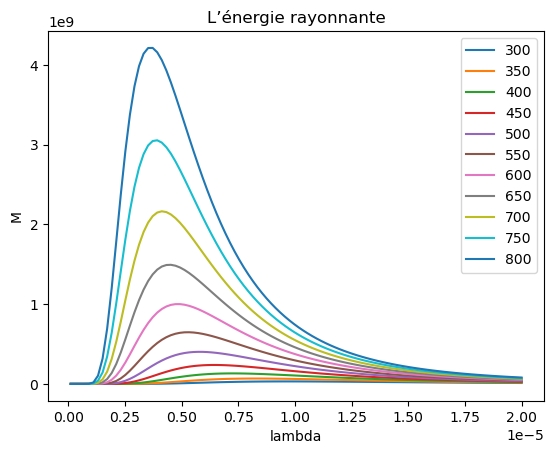

In [2]:
# La fonction M avec ces paramètres h,c,n,k,lamda,T et ses traces pour defferent valeur T
def M(h,c,n,k,lamda,T):
    K = (2 * np.pi * h * c**2  )/(n**2 * lamda**5)
    D = 1 / (np.exp((h*c) / (n * k * T * lamda)) - 1)
    return K*D
h = 6.625e-34
c = 2.995e8
k = 1.380e-23
TEMP = range(300,850,50)
#T = 300.0
lamda = np.linspace(1e-7,2e-5,100)
n = 1.0
for T in TEMP:
    A = M(h,c,n,k,lamda,T)
    plt.plot(lamda,M(h,c,n,k,lamda,T),label=str(T))
plt.title('L’énergie rayonnante')
plt.xlabel('lambda')
plt.ylabel('M')
plt.legend()
plt.show()

2. On souhaite trouver la valeur $\lambda^*$ de $\lambda$ qui maximise l'émittance monochromatique pour une température de surface T donnée. À quelle contrainte est-on soumis si l'on souhaite utiliser la méthode de la section dorée?
Programmer alors cette méthode pour déterminer $\lambda^*$ suivant les différentes valeurs de $\mathrm{T}$.


 Réponse : La constante est-on soumis si l'on souhaite utiliser la méthode de section dorée
est que le fonction unimodal c'est à dire ne possède qu'un seul minimum ou maximum local 

In [3]:
# Algorithme de la séction dorée
def methode(f,T,a,b,epsilon):
    x=a
    y=b
    rho=(-1+np.sqrt(5))/2
    while abs(y-x)>epsilon:
        x=a+(1-rho)*(b-a)
        y=a+rho*(b-a)
        if f(x,T)<f(y,T):
            a=x
        else:
            b=y
    return a


3. Vérifier les lois de Wien : $\lambda T=A$ et $M(\lambda)=R T^5$, où $A$ et $B$ désignent des constantes.

 la constante A de loi de Wein [0.0028958  0.00289581 0.00289581]
 la constatnt B de la loi de Wein [1.28826901e-05 1.28826901e-05 1.28826901e-05]


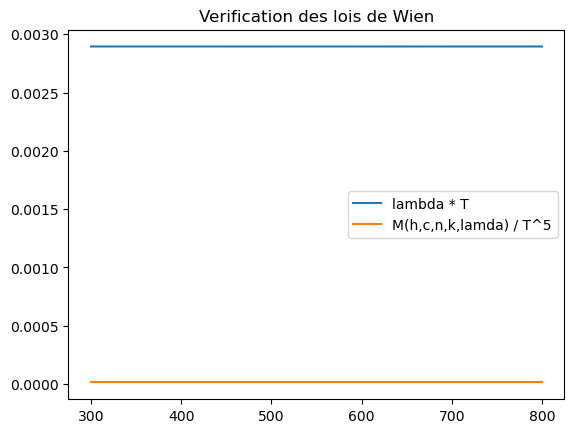

In [4]:
# Question 3 : Vérification des lois de Wien
lambda_max=[]
for T in TEMP:
    lambda_max.append(methode(lambda lamda, _: M(h,c,n,k,lamda,T),T,1e-7,2e-5,1e-10))
fig=plt.figure(2)
plt.clf()
t=np.array([T for T in TEMP],dtype=np.float64)
A=lambda_max*t
print(" la constante A de loi de Wein",A[:3])
plt.plot(t,A,label='lambda * T')
B=M(h,c,n,k,np.array(lambda_max),t)/(t**5)
print(" la constatnt B de la loi de Wein",B[:3])
plt.plot(t,B,label='M(h,c,n,k,lamda) / T^5')
plt.title('Verification des lois de Wien')
plt.legend()
plt.show()

On peut facilement voir que les deux tracés sont constants, ce qui signifie qu'ils vérifient bien la loi de Wien.

 # Exercice 2 (méthodes de type gradient pour des fonctions quadratiques).

 Soit $n \in \mathbb{N}^*$. Dans tout l'exercice, on désignera par $\langle,\rangle_{\mathbb{R}^n}$ le produit scalaire associé à la norme euclidienne dans $\mathbb{R}^n$. On considère la matrice $A \in \mathbb{S}^n(\mathbb{R})$ et le vecteur $b \in \mathbb{R}^n$ définis par
$$
A_n=\left[\begin{array}{ccccc}
4 & -2 & 0 & & \\
-2 & 4 & -2 & & \\
& \ddots & \ddots & \ddots & \\
& & -2 & 4 & -2 \\
& & & -2 & 4
\end{array}\right] \quad \text { et } \quad b_n=\left[\begin{array}{c}
1 \\
\vdots \\
\vdots \\
\vdots \\
1
\end{array}\right]
$$

On cherche à minimiser la fonction
$$
J_n(x)=\frac{1}{2}\left\langle A_n x, x\right\rangle_{\mathbb{R}^n}-\left\langle b_n, x\right\rangle_{\mathbb{R}^n}
$$
définie sur $\mathbb{R}^n$, à l'aide de méthodes du gradient.

1. Représenter $J_n$ dans le cas $n=2$ sur le pavé $[-10,10]$. On pourra créer une fonction $A(n), b(n)$, une fonction $\operatorname{Jn}(A, b, x)$ puis une fonction $\operatorname{gradJn}(A, b, x)$. Il sera intéressant d'exploiter le format creux de la matrice $A$ afin de diminuer les temps de calcul (utiliser la fonction scipy.sparse.diags pour assembler la matrice).




In [5]:
# Question 1 : Répresenter J_n dans le cas n = 2 sur le pavé [-10,10]
# La matrice A  de format creuse
def A(n):
    return np.diag(4*np.ones(n),0)+np.diag(-2*np.ones(n-1),-1)+np.diag(-2*np.ones(n-1),+1)
# Le vecteur b
def b(n):
    return np.ones(n)
# La fonction J_n 
def Jn(x):
    return 0.5*np.dot(np.dot(A(n),x),x)-np.dot(b(n),x)
# Le gradient de J_n
def gradJn(x):
    return np.dot(A(n),x) - b(n)

Voici la représentation dans le cas  où n = 2.

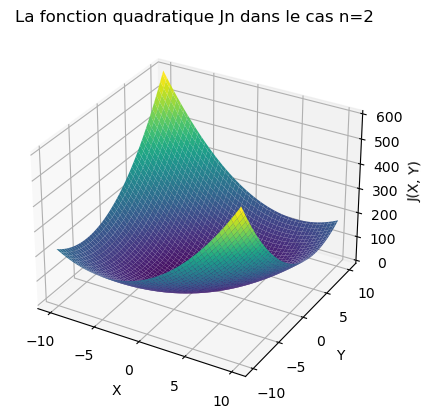

In [6]:
# Initialisation de pavé [-10,10]
n = 2
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
# Calcul de Jn sur le pavé [-10,10]


Vecteur_Jn = np.ones((100, 100))
for i in range(100):
    for j in range(100):
        Vecteur_Jn[i][j] = Jn(np.array([x[i], y[j]]))
X, Y = np.meshgrid(x, y)
fig = plt.figure(1)


#  La représentation graphique de Jn

ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Vecteur_Jn, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('J(X, Y)')
ax.set_title('La fonction quadratique Jn dans le cas n=2')
plt.show()

2. Vérifier numériquement, pour certaines valeurs de $n$ que $A_n$ est définie positive, puis déterminer la solution du problème dans le cas $n=2$.

In [7]:
# On calcule les valeurs propres de A
# On vérifie si elles sont toutes positives on prend cette liste des valeur de n
N = [ 2, 5, 10,20]
for i in N:
    Val_propres = np.linalg.eigvals(A(10))
    if(np.all(Val_propres > 0)):
       print("la matrice A est définie positive")
    else:
       print("la matrice A n'est pas définie positive")



la matrice A est définie positive
la matrice A est définie positive
la matrice A est définie positive
la matrice A est définie positive


 Puisque toutes les valeurs propres sont positives, A est définie positive, on peut remarquer que les mineurs principaux de la matrice sont positive.


Le minimum de $J_n$ dans le cas n = 2  
On a le gradient de $J_n$ égale   $gradJn = Ax-b$  
D'après l'égalité d'Euler, le minimum est caractérisé 

par le gradient c-à-d $gradJn(X) = 0$  

Donc, c'est $AX = b$  
Par suite, on peut calculer la solution $X = A^{-1} b$  

In [8]:
X = np.linalg.inv(A(2)) @ b(2)
print("la solution du problème dans le cas n = 2 est X = ",X)

la solution du problème dans le cas n = 2 est X =  [0.5 0.5]


3. Nous allons étudier deux méthodes de type gradient.

a) La méthode du gradient à pas constant. Écrire une fonction dont les arguments sont la fonction J, son gradient gradJ, s (le pas de la méthode) et x0 (l'initialisation), mettant en oeuvre l'algorithme du gradient à pas fixe. Expliquer brièvement pourquoi il est important de choisir le pas fixe, ni trop grand, ni trop petit.



Réponse : Au question a )  On prend le pas fixe s pas  grand (resp. petite) pour éviter la divergence ( resp.la convergence lentement) de la méthode  

In [9]:
# Question 3 : Implémenter la méthode de descente de gradient
# a) - La méthode de descente de gradient à pas constant

def gradient_pas_constant(Jn,gradJn,x0,s,eps):
    iter=0
    x=x0
    x_list=[]
    d=-gradJn(x)
    while np.linalg.norm(d)>eps and iter<50000:
        x=x+s*d
        d=-gradJn(x)
        x_list.append(x)
        iter += 1
    print("le nombre d'itérations pour la méthode de gradient à pas constant est : ",iter)
    return np.array(x_list)


b) La méthode du gradient à pas optimal. Écrire une fonction dont les arguments sont la fonction $\mathrm{J}$, son gradient gradJ et x0 (l'initialisation), mettant en oeuvre l'algorithme du gradient à pas optimal. On pourra, au choix, utiliser la formule du pas optimal calculée en cours ou la méthode de la section dorée pour déterminer le pas optimal.

In [10]:
# b) - La méthode de descente de gradient à pas optimal

def gradient_descent_pas_optimal(Jn,gradJn,x0,eps):
    iter=0
    x=x0
    # on prend d = -gradJn(x) comme resultat de cours
    d=-gradJn(x)
    # le pas optimal s qui est dans le cours s_k = ||d_k||^2 / <A d_k,d_k>  
    s=(np.linalg.norm(d))**2/(np.dot(np.dot(A(n),d),d))
    x_list=[]
    while np.linalg.norm(d)>eps and iter<50000:
        x=x+s*d
        d=-gradJn(x)
        s=(np.linalg.norm(d))**2/(np.dot(np.dot(A(n),d),d))
        x_list.append(x)
        iter +=1
    print("le nombre d'itérations pour gradient à pas optimal est : ",iter)
    return np.array(x_list)

4. Appliquer les deux méthodes précédentes (on pourra utiliser $\mathrm{J}=\mathrm{l}$ ambda $\mathrm{x}: \operatorname{Jn}(\mathrm{A}, \mathrm{b}, \mathrm{x})$ et gradJ=lambda $\mathrm{x}: \operatorname{gradJn}(\mathrm{A}, \mathrm{b}, \mathrm{x})$ pour particuliser les fonction précédentes). Présentation des résultats :

a) pour $n=2$, afficher sur une même figure les courbes de niveau de Jn et son gradient (champ de vecteur). Tracer sur la même figure les lignes qui relient les itérés $x_k$ des méthodes de gradient à pas constant et à pas optimal.



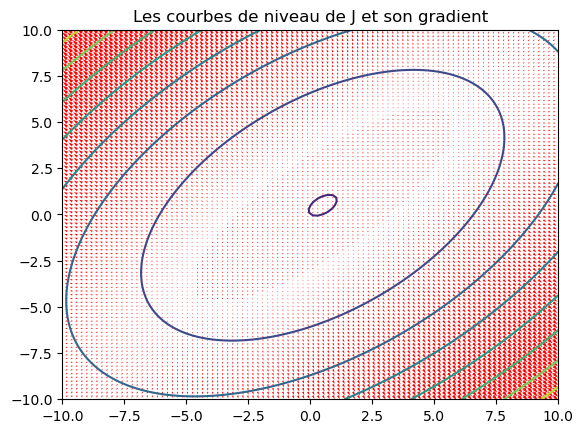

le nombre d'itérations pour la méthode de gradient à pas constant est :  4774
le nombre d'itérations pour gradient à pas optimal est :  1


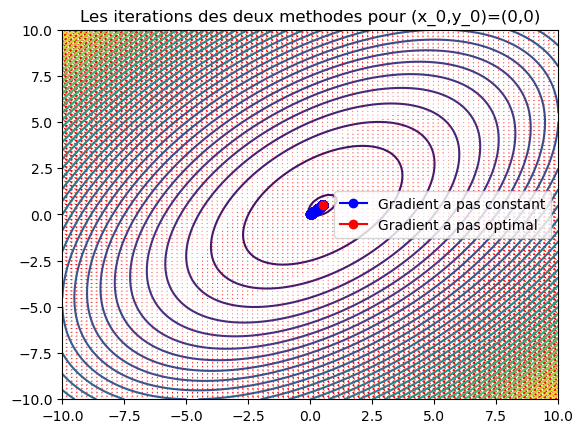

In [11]:

# Question 4 : Visualisation des courbes de niveau de J et de son gradient

# a) - Visualisation des courbes de niveau de J 
# son gradient et les iterations x_k des deux méthodes

# Initialisation de pavé [-10,10]
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Calcul de Jn et son gradient sur le pavé [-10,10]
Vecteur_Jn = np.ones((100, 100))
Vecteur_grad_Jn_x = np.ones((100, 100))
Vecteur_grad_Jn_y = np.ones((100, 100))
# Calcul de Jn et son gradient sur le pavé [-10,10]
for i in range(100):
    for j in range(100):
        Vecteur_Jn[i][j] = Jn(np.array([x[i], y[j]]))

# Calcul de son gradient
for i in range(100):
    for j in range(100):
        Vecteur_grad_Jn_x[i][j] = gradJn(np.array([x[i], y[j]]))[0]
        Vecteur_grad_Jn_y[i][j] = gradJn(np.array([x[i], y[j]]))[1]

# Réprésentation graphique de Jn et son gradient
X, Y = np.meshgrid(x, y)
plt.figure()
plt.contour(X, Y, Vecteur_Jn,)
V, U = [Vecteur_grad_Jn_x,Vecteur_grad_Jn_y]
plt.quiver(X, Y, U, V, color='red')
plt.title("Les courbes de niveau de J et son gradient")
plt.show()

# Visualisation des itérations des deux méthodes pour (x_0,y_0)=(0,0)

x0=np.array([0,0])
eps = 1e-4
Pas_constant = gradient_pas_constant(Jn,gradJn,x0,0.001,eps)
Pas_optimal = gradient_descent_pas_optimal(Jn,gradJn,x0,eps)

X, Y = np.meshgrid(x, y)
plt.figure(2)
plt.contour(X, Y, Vecteur_Jn,40)
V, U = [Vecteur_grad_Jn_x,Vecteur_grad_Jn_y]
plt.quiver(X, Y, U, V,units= 'width', color='red')
plt.plot(Pas_constant [ :,0],Pas_constant[:,1],'-bo', label='Gradient a pas constant')
plt.plot(Pas_optimal[:,0],Pas_optimal[:,1], '-ro', label='Gradient a pas optimal')
plt.title("Les iterations des deux methodes pour (x_0,y_0)=(0,0)")
plt.legend()
plt.show()

# Remarque : 
On pour conclure facilement que la méthode a pas optimal converge plus vite que pas constant grace au nombre des itérations 

# Supplémentaire
Algorithme de gradient a pas de section dorré pour voir bien le nombre d'itération et la convergence 

In [12]:
# La gradient a pas optimal pour la fonction f
def grad_pas_optimal(jn,x0,eps):
    iter=0
    x=x0
    d=-gradJn(x)
    pas=Section_dorre(x,d,0,1)
    x_list=[x0]
    while np.linalg.norm(d)>eps and iter<50000:
        x=x+pas*d
        d=-gradJn(x)
        pas=Section_dorre(x,d,0,1)
        x_list.append(x)
        iter +=1
    print("Nombre d'iteration = ",iter)
    return np.array(x_list)


# La méthode de la séction dorée
def Section_dorre(x,d,a,b):
    iter=0
    z=a
    t=b
    r=(-1+np.sqrt(5))/2
    while abs(t-z)>0.001 and iter<50000:
        z=a+(1-r)*(b-a)
        t=a+r*(b-a)
        # on sait que argmin(Jn) = argmax(-Jn)
        if -Jn(x + z*d)<-Jn(x + t*d):
            a=z
        else:
            b=t
        iter +=1
    return a

Nombre d'iteration =  2
La solution au choix de section dorré [[0.75       0.75      ]
 [0.50018328 0.50018328]
 [0.50000057 0.50000057]]


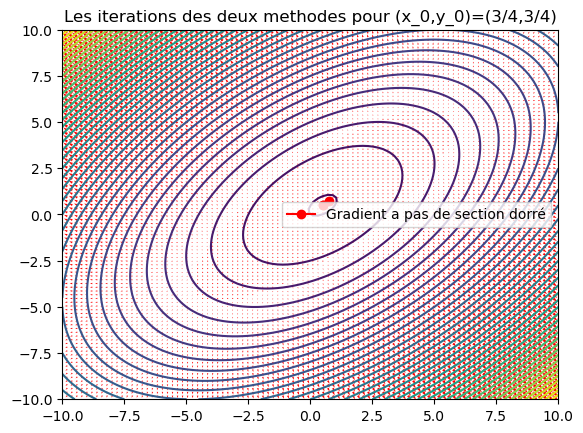

In [13]:
# Visualisation des itérations des deux méthodes de la section dorré pour (x_0,y_0)=(3/4,3/4)
x0=np.array([3/4,3/4])
eps = 1e-4
Pas_section_dorre = grad_pas_optimal(Jn,x0,eps)
print("La solution au choix de section dorré",Pas_section_dorre)

X, Y = np.meshgrid(x, y)
plt.figure(1)
plt.contour(X, Y, Vecteur_Jn,40)
V, U = [Vecteur_grad_Jn_x,Vecteur_grad_Jn_y]
plt.quiver(X, Y, U, V,units= 'width', color='red')
plt.plot(Pas_section_dorre[:,0],Pas_section_dorre[:,1], '-ro', label='Gradient a pas de section dorré')
plt.title("Les iterations des deux methodes pour (x_0,y_0)=(3/4,3/4)")
plt.legend()
plt.show()

b) pour $n$ prenant les valeurs $10,20,30,50,100$, tester chacune des deux méthodes et comparer à l'aide d'un graphique et/ou d'un tableau, la rapidité de convergence de chacune de ces méthodes. Commenter les résultats obtenus.

# Tistons ces deux méthodes avec differents valeurs pour voir la convergence
D'après le cours, on a la convergence est d'ordre  $p$ si,
$$||x_{k+1}-\bar{x}||\leq C||x_k-\bar{x}||^p$$ 
En passant au logarithme on obtient,
$$log(||x_{k+1}-\bar{x}||)\leq log(C)+plog(||x_k-\bar{x}||)$$  
On trace $log(||x_{k+1}-\bar{x}||)$ en fonctionne de $k$, ça ne donne une droite affine car numériquement on suppose $log(||x_{k+1}-\bar{x}||)= log(C)+plog(||x_k-\bar{x}||)$

le nombre d'itérations pour la méthode de gradient à pas constant est :  6312
le nombre d'itérations pour gradient à pas optimal est :  256


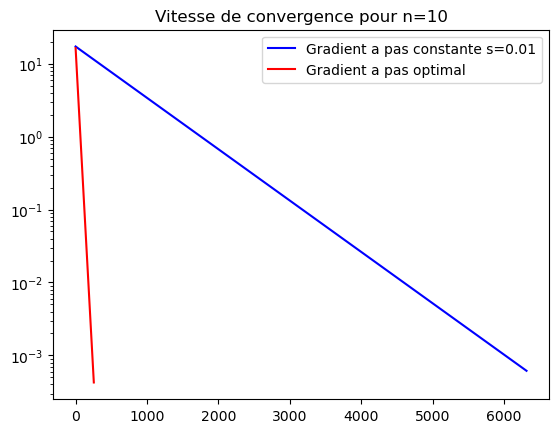

le nombre d'itérations pour la méthode de gradient à pas constant est :  23736
le nombre d'itérations pour gradient à pas optimal est :  799


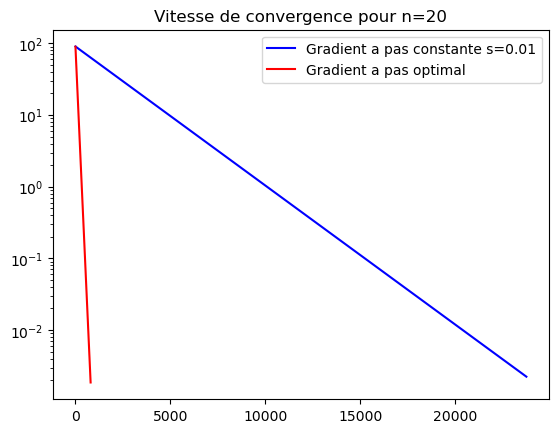

le nombre d'itérations pour la méthode de gradient à pas constant est :  50000
le nombre d'itérations pour gradient à pas optimal est :  2001


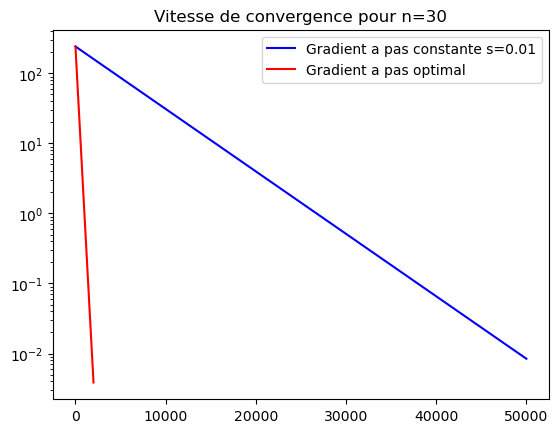

le nombre d'itérations pour la méthode de gradient à pas constant est :  50000
le nombre d'itérations pour gradient à pas optimal est :  5903


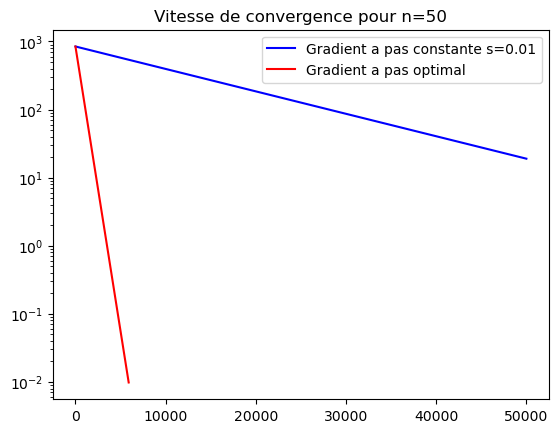

le nombre d'itérations pour la méthode de gradient à pas constant est :  50000
le nombre d'itérations pour gradient à pas optimal est :  23567


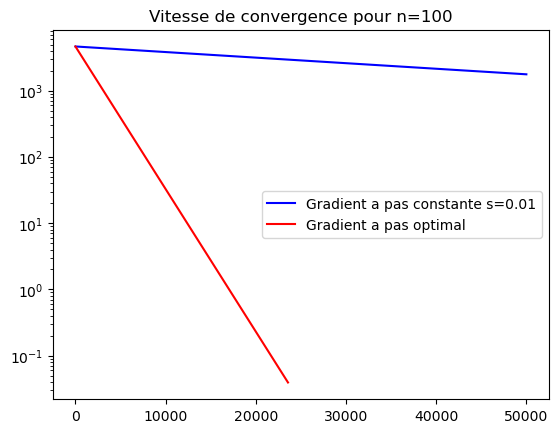

In [14]:

#Vitesse de convergence des deux méthodes
# Testons les deux méthodes de descente de gradient pour différentes valeurs de n
N = [10,20,30,50,100]
# Calcul des résultats
eps = 1e-4
for i in N : 
    n=i
    x0=np.random.rand(n)
    X_exact_main = np.linalg.solve(A(n),b(n))
    grad_pas_constant = gradient_pas_constant(Jn,gradJn,x0,0.01,eps)
    grad_pas_optimal = gradient_descent_pas_optimal(Jn,gradJn,x0,eps)
    k_constant = len(grad_pas_constant)
    k_optimal = len(grad_pas_optimal ) 

    Error_constan = []
    for j in range(k_constant) :
        norm=np.linalg.norm(grad_pas_constant[j]-X_exact_main)
        Error_constan.append(norm)

    Error_optimal = []
    for j in range(k_optimal):
        norm=np.linalg.norm(grad_pas_optimal [j]-X_exact_main)
        Error_optimal.append(norm)
    # Réprésentation des résultats
    plt.figure()
    plt.plot(np.linspace(1,k_constant , k_constant ) ,Error_constan,'b'
    , label='Gradient a pas constante s=0.01')

    plt.plot(np.linspace(1,k_optimal,k_optimal),Error_optimal,'r'
    , label='Gradient a pas optimal')

    plt.yscale('log')
    plt.title("Vitesse de convergence pour n={}".format(i))
    plt.legend()
    plt.show()

# Commentaire :
 - On voit que la méthode du gradient à pas optimal converge plus vite par rapport à la méthode du gradient à pas constante, car dans les graphes la droite rouge qui correspond à l'erreur de la méthode du gradient à pas optimal est toujours au-dessous de la droite bleu (erreur du gradient à pas constant).
 -  Si $p$ est grand alors la méthode sera converger très vite ou $p$ est la pente de notre droite.



# Exercice 3 (Fonction de Rosenbrock). 
On définit la fonction de Rosenbrock, également appelée Rosenbrock banana, par
$$
f(x, y)=(x-1)^2+10\left(x^2-y\right)^2 .
$$
1. Étude théorique.

a) Trouver les points critiques de $f$ et démontrer que $f$ admet un unique minimum global qu'elle atteint en $(\bar{x}, \bar{y})=(1,1)$.




 La fonction $f$ Rosenbrock est une fonction polynomiale continue sur $R^2$.
  Soit $(\bar{x},\bar{y})\in \mathbb{R}^2$ un point critique de $f$, Alors on a la caractérisation d'Euler :
\begin{align*}
\nabla f(\bar{x},\bar{y}) &= \begin{pmatrix}
    2(\bar{x}-1)+40\bar{x}(\bar{x}^2-\bar{y}) \\
    -20(\bar{x}^2-\bar{y})
\end{pmatrix} = \begin{pmatrix}
0\\0
\end{pmatrix} \\
&\Leftrightarrow 
\begin{pmatrix}
    2(\bar{x}-1)+40\bar{x}(\bar{x}^2-\bar{x}^2) = 0\\
    \bar{x}^2 = \bar{y}
\end{pmatrix} & \\
&\Leftrightarrow 
\begin{pmatrix}
\bar{x}\\\bar{y}
\end{pmatrix} = \begin{pmatrix}
1\\1
\end{pmatrix}
\end{align*}
Or on a $f(x,y)\geq 0$ comme somme de deux terme positive et puisque $f(1,1) = 0$
alors $f(x,y)\geq 0=f(1,1)$, pour tout $(x,y)$ dans $\mathbb{R}^2$ alors f admet un minimum locale qu'elle atteint en $(1,1)$, de plus elle est unique car si $(x,y)$ est un autre minimum alors sera réaliser l'équation d'Euler c-à-d sera un point critique de $f$ pourtant $f$ admet une unique point critique qui est $(1,1)$ parsuite le point $(1,1)$ est un minimum globale de $f$.

b) Déterminer $\nabla^2 f(\bar{x}, \bar{y})$, puis calculer son conditionnement (on pourra utiliser np.linalg. cond). Rappeler la signification de cette quantité.

On va calculer la Hessien de $f$ pour tout $(x,y)\in \mathbb{R}^2$ on a 
 $$\nabla^2f(x,y)=\begin{pmatrix}
	2+40(x^2-y) + 80x^2 & -40x\\
	-40x & 20
\end{pmatrix}$$
au point critique $(1,1)$ on a 
donc $$\nabla^2f(1,1)=\begin{pmatrix}
	82 & -40\\
	-40 & 20
\end{pmatrix}$$
On trouve que cette matrice est définie positive en $(1,1)$.

In [15]:
# les valeurs propres d'Hessien en (1,1) 
Val_propres = np.linalg.eigvals([[82, -40], [-40, 20]])
print("les valeurs propres d'Hessien en (1,1) sont : ",Val_propres)

les valeurs propres d'Hessien en (1,1) sont :  [101.60632372   0.39367628]


In [16]:
# On donne la fonction f, son gradient et sa hessienne
def f(x,y):
    return (x - 1)**2 + 10 * (x**2 - y)**2

def gradf(x,y):
    return np.array([2*(x - 1) + 40 * x * (x**2 - y) , -20 * (x**2 - y)])

def hessf(x,y):
    return np.array([[2+ 40 *( x**2 -  y) + 80 * x**2 , -40 * x ] , [-40 * x , 20]])

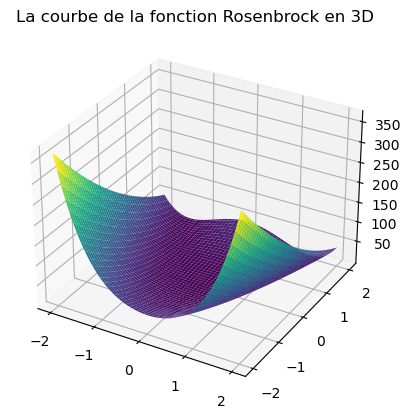

In [17]:
# Réprésentation graphique de f 
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X,Y), cmap='viridis')
ax.set_title('La courbe de la fonction Rosenbrock en 3D')
plt.show()

In [18]:
# Calculons la conditionnement de la hessienne de f en (1,1)
k = c=np.linalg.cond(hessf(1,1)) 
k

258.09612547457573


 Le conditionnement donne une indication de la stabilité de la solution d'un système d'équations linéaires. Une matrice bien conditionnée a un nombre de conditionnement proche de 1, ce qui signifie que la solution du système est stable de petites variations dans les termes indépendants ou dans les coefficients de la matrice entraînent de petites variations dans la solution.
Donc on définit le conditionnement $\kappa(A)=|||A||||||A^{-1}|||$. donc cette quantité affirme que si $\kappa$ est grand ce n'est pas l'appelle de résoudre le système parce que il va nous donner que des erreurs sur $x$.

2. Étude Numérique. Programmer la recherche du minimum de la fonction $f$ dans $\mathbb{R}^2$ à l'aide de la méthode de gradient à pas constant puis à pas optimal développé dans l'exercice précédent. Tracer les lignes de niveaux de $f$, les itérés pour chaque méthode et commenter les résultats obtenus.

D'abord on va faire les algorithme des trois méthode pour f 

In [19]:
# La gradient a pas constant pour la fonction f
def grad_pas_constant(f,x0,s,eps):
    iter=0
    x=x0
    d=-gradf(x[0],x[1])
    x_list=[x0]
    while np.linalg.norm(d)>eps and iter<50000:
        x=x+s*d
        d=-gradf(x[0],x[1])
        x_list.append(x)
        iter +=1
    print("le nombre d'itérations pour la méthode de gradient à pas constant est : ",iter)
    return np.array(x_list)
# La gradient a pas optimal pour la fonction f
def grad_pas_optimal(f,x0,eps):
    iter=0
    x=x0
    d=-gradf(x[0],x[1])
    pas=Section_dorré(x,d,0,1)
    x_list=[x0]
    while np.linalg.norm(d)>eps and iter<50000:
        x=x+pas*d
        d=-gradf(x[0],x[1])
        pas=Section_dorré(x,d,0,1)
        x_list.append(x)
        iter +=1
    print("le nombre d'itérations pour gradient à pas de section dorré est : ",iter)
    return np.array(x_list)


# La méthode de la séction dorée
def Section_dorré(x,d,a,b):
    iter=0
    z=a
    t=b
    r=(-1+np.sqrt(5))/2
    while abs(t-z)>0.001 and iter<50000:
        z=a+(1-r)*(b-a)
        t=a+r*(b-a)
        # on sait que argmin(f)=argmax(-f)
        if -f(x[0]+z*d[0],x[1]+z*d[1])<-f(x[0]+t*d[0],x[1]+t*d[1]):
            a=z
        else:
            b=t
        iter=iter+1
    return a

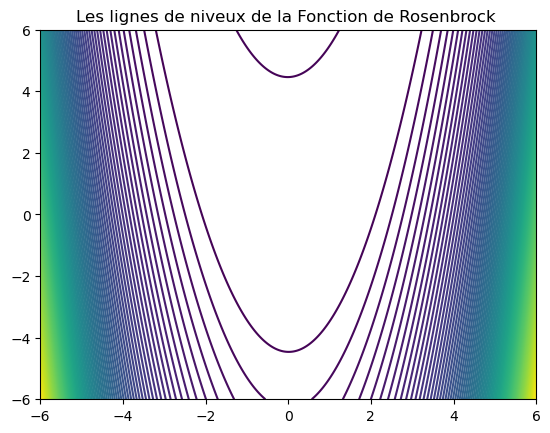

In [20]:
#  Visualisation des courbes de niveau de f
x = np.linspace(-6, 6, 1000)
y = np.linspace(-6, 6, 1000)
X, Y = np.meshgrid(x, y)

#Les lignes de niveux suelment
plt.figure()
plt.contour(X, Y, f(X,Y),100)
plt.title('Les lignes de niveux de la Fonction de Rosenbrock ')
plt.show()

le nombre d'itérations pour la méthode de gradient à pas constant est :  2004
le nombre d'itérations pour gradient à pas de section dorré est :  170


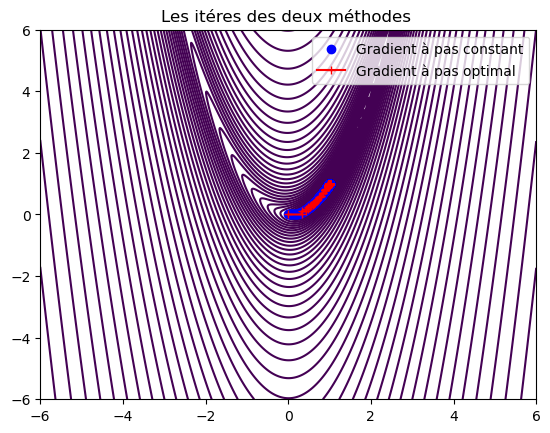

In [21]:
#  Visualisation des courbes de niveau de f avec les itérations des deux méthodes
x0=np.array([0,0])
eps = 1e-4
x_list1_pasfixe=grad_pas_constant(f,x0,0.01,eps)
x_list2_pasopti=grad_pas_optimal(f,x0,eps)

#Les lignes de niveux avec les itérations des deux méthode
plt.figure()
plt.contour(X, Y, f(X,Y),levels=np.logspace(-50,50,1000))
plt.plot(x_list1_pasfixe[:,0],x_list1_pasfixe[:,1],'bo', label='Gradient à pas constant')
plt.plot(x_list2_pasopti[:,0],x_list2_pasopti[:,1], 'r+-', label='Gradient à pas optimal')
plt.title("Les itéres des deux méthodes ")
plt.legend()
plt.show()